# Welcome to your second assignment!

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry. We need you to upload the .ipynb-file and the exported .pdf of this notebook.

If you have any questions, ask them in either in the tutorials or in the "Mattermost" channel: https://mattermost.imp.fu-berlin.de/biorobotics/channels/ssl_ws_2324


In this assignment, we want you to get more comfortable with unsupervised learning algorithms and building models using the machine learning library [PyTorch](https://pytorch.org/). This also includes deadling with latent representations of our model.

# Slide Review

[Google Form](https://forms.gle/7EjyGKvmbBUT2N7y7) for the slide review. Please take a minute to scroll over the slides again and improve your lecture.

Please make sure to only choose your top 5 slides per lecture!

# PapagAI

From this week onwards we start the reflective study we told you about on the first lecture.
Register on the [PapagAI website](https://www.papag.ai) and write your first reflection about your impressions and challenges in the context of the lectures and tutorials you had this and previous week. The size of reflection can be anywhere bigger than 100 words. You can check out this [YouTube video](https://www.youtube.com/watch?v=QdmZHocZQBk&ab_channel=FernandoRamosL%C3%B3pez) with instructions on how to register, create a reflection and get an ai feedback.

Please note, that this task is an obligatory one for this course and make sure each of you does the reflection, not only one person per group.

#### Please state both names of your group members here:
Authors: Namrata De, Manasi Acharya

# Assignment 2: DeepCluster

Inspired by [DeepCluster](https://arxiv.org/pdf/1807.05520.pdf), we want you perform representation learning on the MNIST dataset using kMeans.


## Ex. 2.1 Building a PyTorch model
Build a model with the follwoing architecture:

### *Input layer -> 4x Conv layer with [8,16,32,16] channels (kernel size of your choice) -> 1 FC layer -> output layer* <br>

Further information on the training process:
- Use ReLU functions as activations for all layers except the output layer,
- Use the softmax function on your output,
- Your training algorithm should use mini-batches with the size of your choice,
- Pick the optimizer you like the most

Train your classifier model on the [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) handwritten digits dataset. You should be able to achieve an accuracy of at least 95% on the test set. Plot the loss per training epoch/iteration.  **(RESULT)**

Epoch 1/10
938/938 [==============================] - 89s 93ms/step - loss: 0.1375 - accuracy: 0.9585 - val_loss: 0.0643 - val_accuracy: 0.9803
Epoch 2/10
938/938 [==============================] - 80s 85ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0398 - val_accuracy: 0.9876
Epoch 3/10
938/938 [==============================] - 89s 95ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0345 - val_accuracy: 0.9884
Epoch 4/10
938/938 [==============================] - 86s 91ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0274 - val_accuracy: 0.9915
Epoch 5/10
938/938 [==============================] - 84s 89ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0458 - val_accuracy: 0.9875
Epoch 6/10
938/938 [==============================] - 82s 88ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0364 - val_accuracy: 0.9909
Epoch 7/10
938/938 [==============================] - 88s 94ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0385 - val_accuracy:

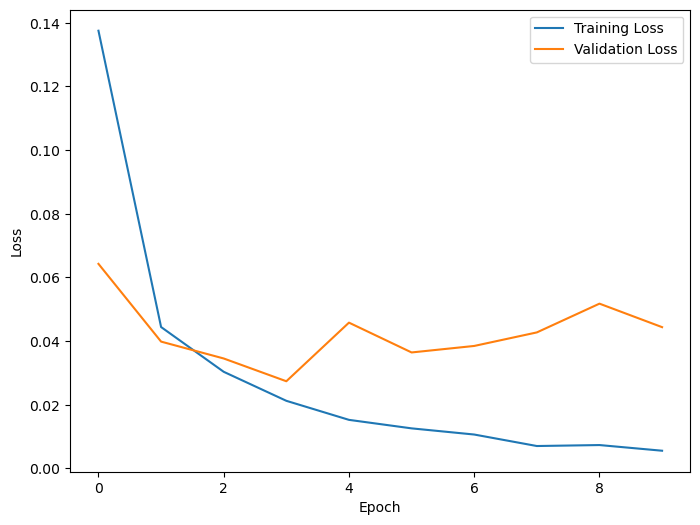

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values

# Define the CNN architecture
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(16, (3, 3), activation='relu'),
    
    # Flatten layer
    layers.Flatten(),
    
    # Fully connected layer
    layers.Dense(128, activation='relu'),
    
    # Output layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define batch size and number of epochs
batch_size = 64
epochs = 10

# Train the model
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, 
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print test accuracy
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training loss per epoch
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Ex. 2.2 kMeans

Implement the k-Means clustering algorithm. **(RESULT)**

Plot the within cluster variance for different k's on the MNIST test set. **(RESULT)**

C:\Users\macha\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


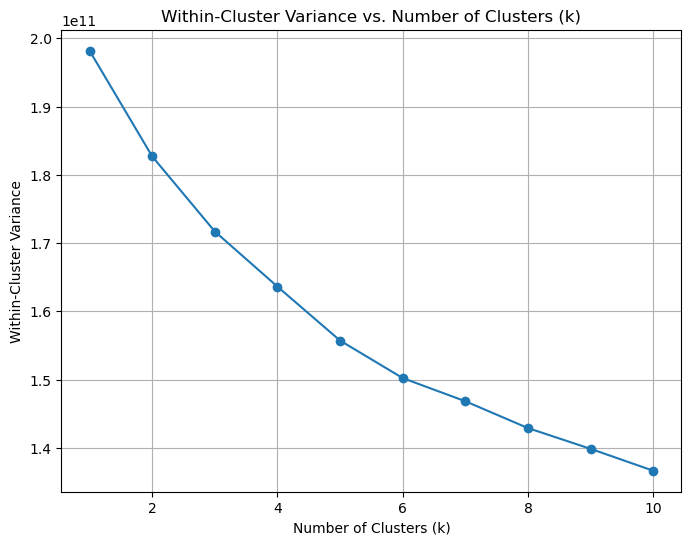

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Custom function to calculate the (Euclidean) distance between two points
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Implementing the custom k-Means clustering algorithm
def your_kmeans(X, k, max_iters=100):
    # Randomly initialize the cluster centroids
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest cluster
        clusters = [[] for _ in range(k)]
        for data_point in X:
            distances = [euclidean_distance(data_point, centroid) for centroid in centroids]
            cluster_assignment = np.argmin(distances)
            clusters[cluster_assignment].append(data_point)
        
        # Update the cluster centroids
        new_centroids = [np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        
        # Check for convergence
        if all(np.allclose(centroids[i], new_centroids[i]) for i in range(k)):
            break
        centroids = new_centroids

    return centroids, clusters

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data.to_numpy().astype(float)
y = mnist.target.to_numpy()

# Reduce the dimensionality using PCA (to speed up processing)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Define a range of k values to test
k_values = range(1, 11)
inertia_values = []

# Perform custom k-Means clustering for different k values and calculate within-cluster variance
for k in k_values:
    centroids, clusters = your_kmeans(X_pca, k)
    inertia = sum(np.sum((data - centroid) ** 2) for centroid, cluster in zip(centroids, clusters) for data in cluster)
    inertia_values.append(inertia)

# Plot the within-cluster variance for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Within-Cluster Variance vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Variance')
plt.grid(True)
plt.show()


## Ex. 2.3 DeepCluster

[DeepCluster](https://arxiv.org/pdf/1807.05520.pdf) trains representations using k-Means labels. We want you to do the same with your model and kMeans algorithm above.
Train your model from scratch again on a classifier (one fully connected layer) using the newly assigned kMeans labels as targets. **(RESULT)**<br>

Evaluate the model performance training only a new classifier (again, one fc layer), and do NOT retrain the whole model. State the accuracy of your final classifier on the MNIST test set. **(RESULT)**

Info: If you think your k-Means has flaws or is running too slow for this task, feel free to use a library version, i.e. sklearn.

In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Loading and preprocessing the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)  


# Defining the neural network (model)
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.features = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),  
            nn.ReLU()
        )
        self.fc = nn.Linear(128, 10)  
        
    def forward(self, x):
        x = self.features(x)
        x = self.fc(x)
        return x


# Initialize the model and train it to get representations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleNet().to(device)


# Training the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):  # Train for a few epochs
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


features = []
labels = []
for i, (images, true_labels) in enumerate(train_loader):
    images = images.to(device)
    outputs = model.features(images)
    features.append(outputs.cpu().detach().numpy())
    labels.append(true_labels.numpy())
    if i >= subset_size // train_loader.batch_size:
        break


features = np.concatenate(features)
labels = np.concatenate(labels)

# Defining subset size for clustering
subset_size = 5024 # to be reduced if required

# Selecting a subset of the features and labels
features_subset = features[:subset_size]
labels_subset = labels[:subset_size]
features_subset.shape

from sklearn.cluster import KMeans #using standard KMeans instead of custom KMeans implemented before

# Applying k-Means clustering
kmeans = KMeans(n_clusters=10)
kmeans.fit(features_subset)
cluster_labels = kmeans.labels_



# Process the labels in parts (due to memory constraints)
batch_size = 32
batches = len(features) // batch_size

# Retrain the classifier using the clustered representations as targets
new_classifier = nn.Linear(128, 10)
optimizer = optim.Adam(new_classifier.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


correct = 0
total = 0


for _ in range(3):  # Fewer training epochs for efficiency
    for i in range(batches):
        inputs = torch.tensor(features[i * batch_size: (i + 1) * batch_size], dtype=torch.float32)
        targets = torch.tensor(cluster_labels[i * batch_size: (i + 1) * batch_size], dtype=torch.long)
        optimizer.zero_grad()
        outputs = new_classifier(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Load MNIST test set for evaluation 
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)  

# Testing the performance of the new classifier on the MNIST test set
with torch.no_grad():
    for images, true_labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += true_labels.size(0)
        correct += (predicted == true_labels).sum().item()

accuracy = 100 * correct / total

print(f'Accuracy of the final classifier on the MNIST test set: {accuracy:.2f}%')

C:\Users\macha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy of the final classifier on the MNIST test set: 97.59%
